# Домашня робота №9

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

### Завантажимо данні та розіб'ємо на тестову та тренувальну вибірку

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### Напишемо функцію, в якій ми зможемо зручно експерементувати за параметрами моделі

In [ ]:
# def create_model(num_layers: int, num_neurons: int, activation_func: str, dropout_rate: float, batch_norm: bool):
#     model = Sequential()
#     model.add(Flatten(input_shape=(28, 28)))

#     for _ in range(num_layers):
#         model.add(Dense(num_neurons, activation=activation_func))
#         if batch_norm:
#             model.add(BatchNormalization())
#         model.add(Dropout(dropout_rate))

#     model.add(Dense(10, activation='softmax'))
    
#     initial_learning_rate = 0.001

#     lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
#     optimizer = Adam(learning_rate=initial_learning_rate)
    
#     model.compile(optimizer=optimizer,
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])

#     return model

###  Напишемо словник з різними варіаціями параметрів

In [ ]:
# param_grid = {
#     'num_layers': [3], # 5
#     'num_neurons': [512], # 128, 256
#     'activation_func': ['relu'], #'sigmoid'
#     'dropout_rate': [0.1, 0.2], # 0.4, 0.5, 0.3
#     'batch_norm': [False] # True
# }

### Проженемо все в циклі та переберемо всі варіації параметрів

In [ ]:
# histories = {}

# for params in product(*param_grid.values()):
#     num_layers, num_neurons, activation_func, dropout_rate, bn = params
#     model = create_model(num_layers, num_neurons, activation_func, dropout_rate, bn)
    
#     history = model.fit(x_train, y_train, epochs=50, batch_size=64,
#                         validation_data=(x_val, y_val), verbose=0)
    
#     key = f"Шари:{num_layers}, Нейрони:{num_neurons}, Активація:{activation_func}, Дропаут:{dropout_rate}, Батч:{bn}"
#     histories[key] = history

#     test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
#     print(f"{key} -> Точність на тестовому наборі: {test_accuracy * 100:.2f}%")


### Після підббору параметрів у мене вийшли такі нацкращі результати   Шари:3, Нейрони:512, Активація:relu, Дропаут:0.1, Батч:False -> Точність на тестовому наборі: 89.70%

### Спробував додати регуляризацію та змінити оптимізатор, перенавчання практично відсутнє, але точність на тестовому датасеті знихилась до 87%

In [ ]:
def create_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    for _ in range(3):
        model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
        model.add(tf.keras.layers.Dropout(0.1))

    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    initial_learning_rate = 0.001

    lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

    optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = create_model()

history = model.fit(x_train, y_train, epochs=40, batch_size=64,
                    validation_data=(x_val, y_val), verbose=0)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Точність на тестовому наборі: {test_accuracy * 100:.2f}%")

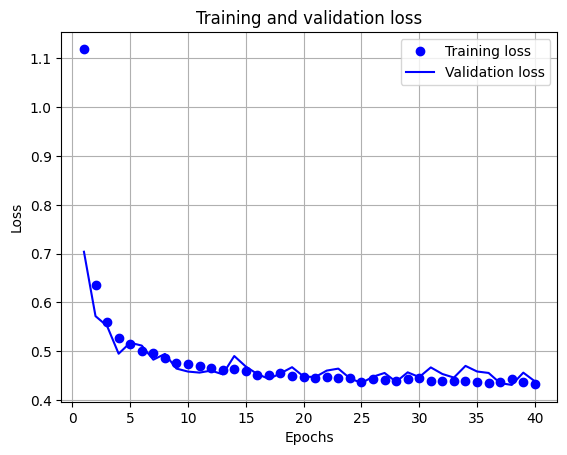

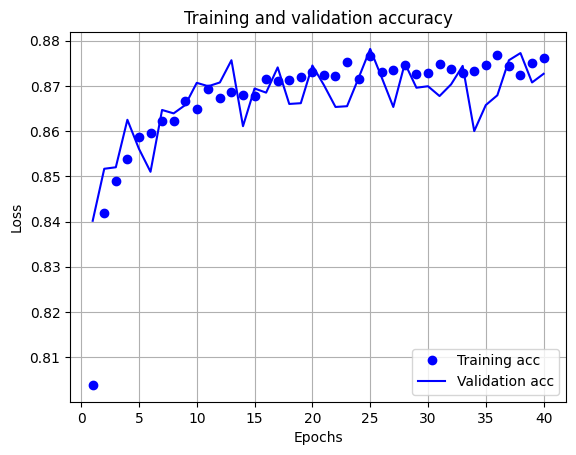

In [77]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()